<a href="https://colab.research.google.com/github/adithyaprabhu007/math-coding-notes/blob/main/svd_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

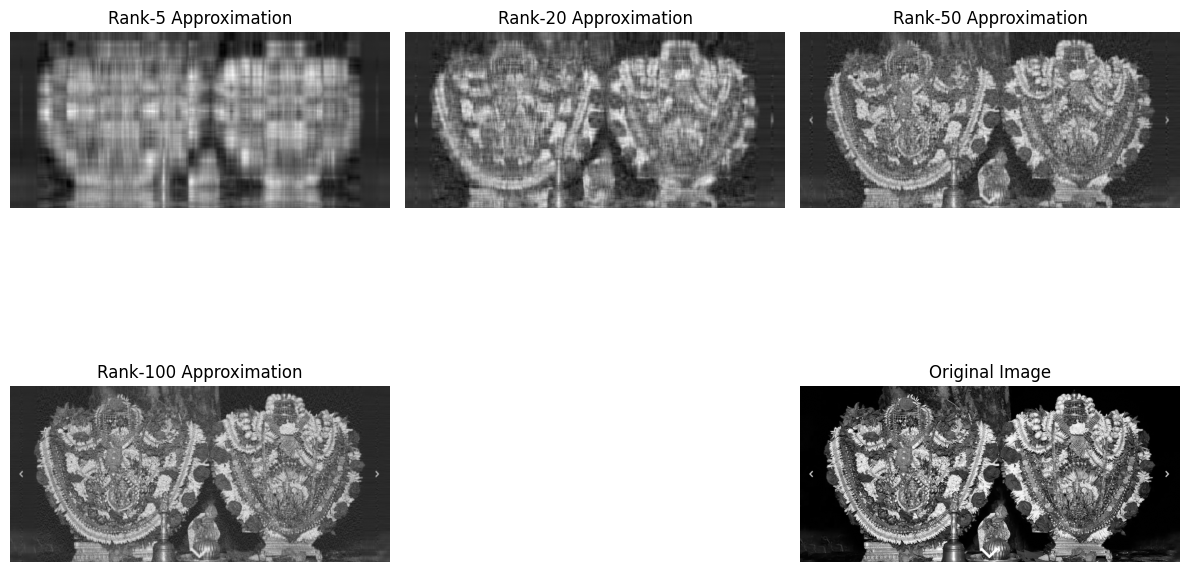

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.color import rgba2rgb

# Load image
image = io.imread('/content/Screenshot 2025-04-17 191003.png')

# Convert RGBA to RGB if needed
if image.shape[2] == 4:
    image = rgba2rgb(image)

# Convert RGB to grayscale
gray = color.rgb2gray(image)

# Apply SVD
U, S, VT = np.linalg.svd(gray, full_matrices=False)

# Function to reconstruct image using top-k singular values
def compress_image(U, S, VT, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))

# List of ranks to visualize compression
ranks = [5, 20, 50, 100]

# Plot original and compressed images
plt.figure(figsize=(12, 8))

for i, k in enumerate(ranks):
    compressed = compress_image(U, S, VT, k)
    plt.subplot(2, 3, i + 1)
    plt.imshow(compressed, cmap='gray')
    plt.title(f"Rank-{k} Approximation")
    plt.axis('off')

# Show original image
plt.subplot(2, 3, 6)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.tight_layout()
plt.show()
